In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "E:/my_courses/data mining/project/data_genre/"
path = "C:/Users/User/Downloads/test2/"

In [35]:
book = pd.read_csv(path + "book_no_null_language_merging.csv")

In [4]:
authors_df = pd.read_json(path + 'goodreads_book_authors.json', lines=True)

# 2️⃣ Data Preparation Phase : Section 2
<hr style="border:2px solid gray"> </hr>

## 📑 Authors clustering

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
با توجه به اینکه داخل دیتاست goodbook-10k اطلاعاتی از نویسندگان جر نام آن ها در دسترس نبود لذا از دیتاست اصلی goodreads اطلاعاتی درباره نویسندگان کتاب ها بدست آورده و تلاش می کنیم براساس این اطلاعات نویسندگان را خوشه بندی کنیم.

In [5]:
authors_df.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [17]:
authors_df.describe()

,average_rating,author_id,text_reviews_count,ratings_count
count,829529.000000,8.295290e+05,829529.000000,8.295290e+05
mean,3.844779,5.751610e+06,106.865331,1.595326e+03
std,0.603013,5.129977e+06,1770.225828,4.479669e+04
min,0.000000,3.000000e+00,0.000000,0.000000e+00
25%,3.580000,9.327180e+05,2.000000,8.000000e+00
50%,3.900000,4.952564e+06,6.000000,3.100000e+01
75%,4.170000,7.838936e+06,20.000000,1.310000e+02
max,5.000000,1.734337e+07,448570.000000,1.853272e+07


### ✅ Finding authors who are present in book dataset 

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
با توجه به اینکه این دیتاست حاوی اطلاعات بالغ بر  800 هزار نویسنده است و ما درون دیتاست اصلی تنها حدود 5 هزار نویسنده منحصر به فرد داریم لذا ابتدا نویسندگانی که درون دیتاست اصلی هستند را جدا سازی می نماییم.

In [22]:
import re
unique_authors = set()
for i in book['authors'].unique():
    res = re.split(',', i)
    for j in res:
        unique_authors.add(j.lstrip())

In [23]:
authors_in_book = pd.DataFrame(columns=authors_df.columns)

In [24]:
for i in unique_authors:
    authors_in_book = authors_in_book.append(authors_df[authors_df['name'] == i])

In [25]:
authors_in_book.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
113224,4.00,8143161,846,Titus Lucretius Carus,23970
111033,3.96,3406353,9173,Justin Halpern,134969
47586,4.21,170658,6468,L.A. Meyer,81221
19145,3.87,138825,43628,Tana French,481984
549338,3.63,14175791,8,Tana French,52


In [26]:
authors_in_book.shape

(5784, 5)

In [27]:
authors_in_book.to_csv(path + 'authors.csv')

### ✅ Normalize authors columns

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
در این قسمت فیلد های عددی مربوطه را نرمالایز کرده و در ادامه برای خوشه بندی مناسب از آن ها استفاده می کنیم.

In [5]:
authors_df = pd.read_csv(path + 'authors.csv')
authors_df.drop(['Unnamed: 0'], axis=1, inplace=True)
authors_df.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,4.00,8143161,846,Titus Lucretius Carus,23970
1,3.96,3406353,9173,Justin Halpern,134969
2,4.21,170658,6468,L.A. Meyer,81221
3,3.87,138825,43628,Tana French,481984
4,3.63,14175791,8,Tana French,52


In [6]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# authors_std = scaler.fit_transform(authors_df.drop(['name'],axis=1))
# authors_std = pd.DataFrame(authors_std, columns=authors_df.drop(['name'], axis=1).columns)
# authors_std.head()

In [7]:

from sklearn.preprocessing import normalize

authors_std = pd.DataFrame(normalize(authors_df.drop(['name'],axis=1)),
                           columns = authors_df.drop(['name'], axis=1).columns)

In [8]:
authors_std.head()

,average_rating,author_id,text_reviews_count,ratings_count
0,4.912076e-07,0.999996,1.038904e-04,0.002944
1,1.161618e-06,0.999212,2.690788e-03,0.039592
2,2.226210e-05,0.902424,3.420220e-02,0.429489
3,7.686619e-06,0.275735,8.665422e-02,0.957320
4,2.560704e-07,1.000000,5.643424e-07,0.000004


<AxesSubplot:>

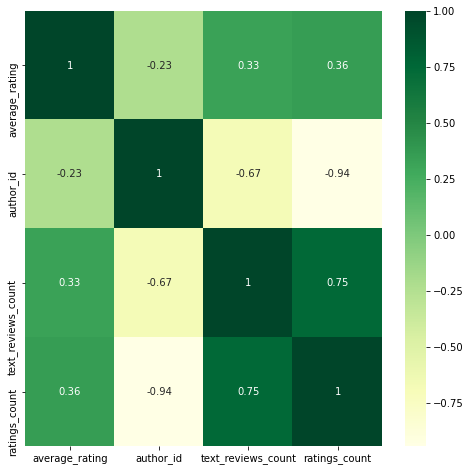

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(8,8))

sns.heatmap(authors_std.corr(), annot = True, fmt='.2g',cmap= 'YlGn')

### ✅ 3D plot of authors' features

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    نمودار سه بعدی زیر توزیع نویسندگان را براساس ویژگی های آن ها نشان می دهد.

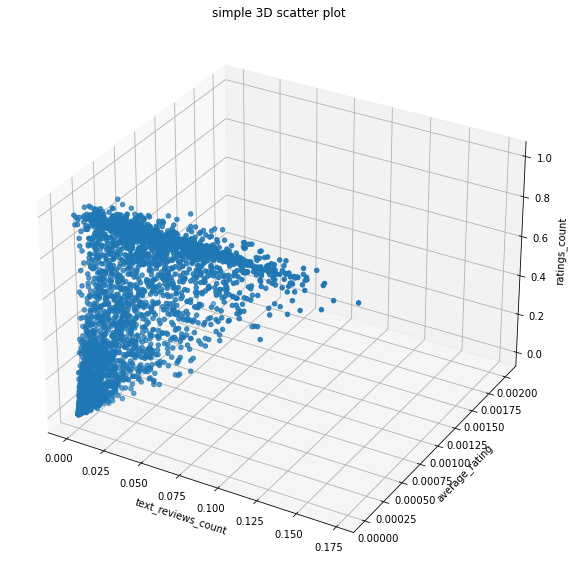

In [10]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(authors_std['text_reviews_count'], authors_std['average_rating'], authors_std['ratings_count'])
plt.title("simple 3D scatter plot")
 
ax.set_ylabel('average_rating')
ax.set_xlabel('text_reviews_count')
ax.set_zlabel('ratings_count')

# show plot
plt.show()

### ✅ How many clusters do we need

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    حال تلاش می کنیم با استفاده از معیار های ارزیابی خوشه بندی مانند اینرسی و شاخص سیلوئت تعداد خوشه مناسب برای نویسندگان را ارزیابی نماییم با توجه به اعداد و نمودار های بدست آمده مشخص است که اینرسی بیشترین تغییر و به عبارت دیگر بیشتر کاهش را زمانی داشته که از 2 خوشه به 3 خوشه رفته ایم و اما شاخص سلوئت دائما با افزایش تعداد خوشه ها در حال کاهش بوده اما میزان کاهش آن در حد چند صدم است و چشمگیر نمی باشد با توجه به این موضوع ما 3 خوشه را انتخاب می کنیم چرا که میزان اینرسی آن به نسبت مناسب و شاخص سیلوئت نظیر آن نیز حدود 0.73 است که مقدار مناسبی ارزیابی می شود.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
for i in range(2, 6):
    kme = KMeans(n_clusters=i)
    labels = kme.fit_predict(authors_std)
    iner = kme.inertia_
    sil = silhouette_score(authors_std, labels)
    silhouette.append(sil)
    inertia.append(iner)

print('inertia for clusters number between 2 to 5')
print(inertia)
print('_____________________________________________')
print('silhouette for clusters number between 2 to 5')
print(silhouette)

inertia for clusters number between 2 to 5
[270.85330824540875, 106.85346383439068, 57.241666945285445, 36.743208425969954]
_____________________________________________
silhouette for clusters number between 2 to 5
[0.7666373292173682, 0.7352857931161181, 0.7114222707452318, 0.6876575224948338]


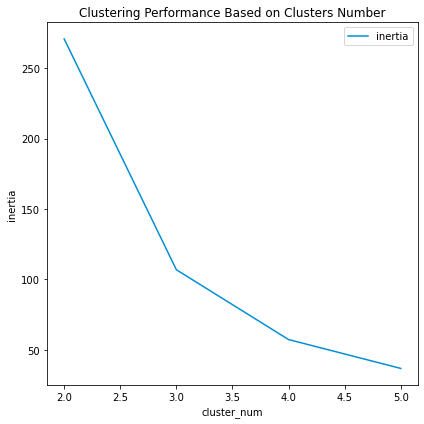

In [12]:
plt.figure(figsize=(6, 6))
plt.plot(range(2, 6), inertia, c="#008fd5", label="inertia")


plt.xlabel("cluster_num")
plt.ylabel("inertia")
plt.legend()
plt.title("Clustering Performance Based on Clusters Number")
plt.tight_layout()
plt.show()

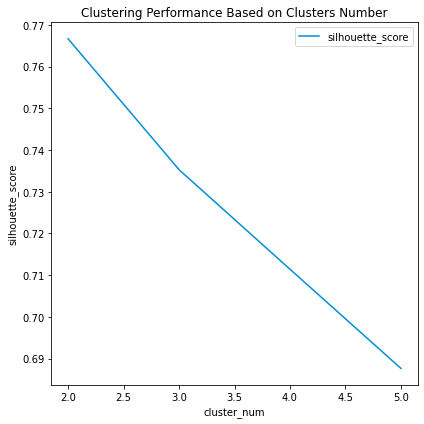

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(range(2, 6), silhouette, c="#008fd5", label="silhouette_score")


plt.xlabel("cluster_num")
plt.ylabel("silhouette_score")
plt.legend()
plt.title("Clustering Performance Based on Clusters Number")
plt.tight_layout()
plt.show()

In [14]:
kmeans01 = KMeans(n_clusters = 3)
cluster = kmeans01.fit_predict(authors_std)
centroids = kmeans01.cluster_centers_

In [21]:
centroids

array([[7.51305025e-05, 7.24500009e-01, 4.10119836e-02, 6.58380417e-01],
       [1.25187685e-05, 9.91187556e-01, 5.14689569e-03, 7.92019534e-02],
       [5.14810538e-05, 1.35743079e-01, 5.22043229e-02, 9.79684151e-01]])

In [15]:
authors_std['Class'] = cluster

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    با توجه به مقادیر زیر به نظر می رسد تعداد نویسندگانی که در خوشه 1 قرار گرفته اند حدودا 3 برابر و تعداد نویسندگانی که در خوشه 2 قرار گرفته اند حدودا 2 برابر تعداد نویسندگان در خوشه 0 است.

In [16]:
authors_std['Class'].value_counts()

1    2971
2    1865
0     948
Name: Class, dtype: int64

In [45]:
authors_std.head()

,average_rating,author_id,text_reviews_count,ratings_count,Class,name
0,4.912076e-07,0.999996,1.038904e-04,0.002944,1,Titus Lucretius Carus
1,1.161618e-06,0.999212,2.690788e-03,0.039592,1,Justin Halpern
2,2.226210e-05,0.902424,3.420220e-02,0.429489,0,L.A. Meyer
3,7.686619e-06,0.275735,8.665422e-02,0.957320,2,Tana French
4,2.560704e-07,1.000000,5.643424e-07,0.000004,1,Tana French


In [27]:
import plotly.graph_objects as go

# 3D scatter plot
#========================= Clusters Which Is Made Using KMeans =========================#
PLOT = go.Figure()

for C in range(0,3):
    
    PLOT.add_trace(go.Scatter3d(x = authors_std[authors_std['Class'] == C]['text_reviews_count'],
                                y = authors_std[authors_std['Class'] == C]['average_rating'],
                                z = authors_std[authors_std['Class'] == C]['ratings_count'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))

            
PLOT.add_trace(go.Scatter3d(x = (centroids[0][2],centroids[1][2],centroids[2][2]) , 
                            y = (centroids[0][0],centroids[1][0],centroids[2][0]), 
                            z = (centroids[0][3],centroids[1][3],centroids[2][3]),
                            mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'centroids'))

PLOT.update_layout(width = 700, height = 700, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'text_reviews_count', titlefont_color = 'black'),
                                yaxis=dict(title = 'average_rating', titlefont_color = 'black'),
                                zaxis=dict(title = 'ratings_count', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    نمودار زیر نحوه دسته بندی نویسندگان در 3 خوشه را به خوبی نشان می دهد.

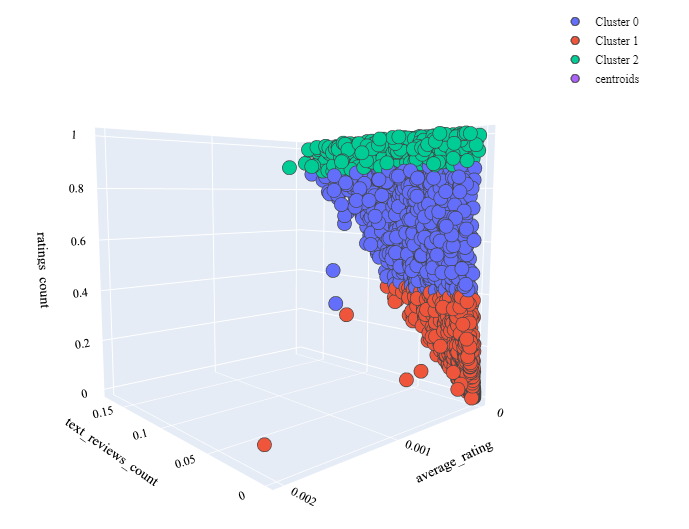

In [28]:
from IPython.display import Image
Image("C:/Users/User/Downloads/test2/Clusters.png")

In [29]:
authors_std[cluster == 0].describe()

,average_rating,author_id,text_reviews_count,ratings_count,Class
count,9.480000e+02,948.000000,948.000000,948.000000,948.0
mean,7.513050e-05,0.724500,0.041012,0.658380,0.0
std,7.226057e-05,0.134407,0.026948,0.145615,0.0
min,6.785359e-07,0.462616,0.001435,0.398791,0.0
25%,3.347279e-05,0.607129,0.020269,0.529627,0.0
50%,5.928053e-05,0.743342,0.035579,0.668265,0.0
75%,1.000753e-04,0.847379,0.058113,0.791559,0.0
max,1.352532e-03,0.916817,0.156044,0.884573,0.0


In [30]:
authors_std[cluster == 1].describe()

,average_rating,author_id,text_reviews_count,ratings_count,Class
count,2.971000e+03,2971.000000,2971.000000,2971.000000,2971.0
mean,1.251877e-05,0.991188,0.005147,0.079202,1.0
std,4.739684e-05,0.017737,0.008699,0.104218,0.0
min,0.000000e+00,0.917816,0.000000,0.000000,1.0
25%,7.258719e-07,0.993246,0.000382,0.005813,1.0
50%,1.471344e-06,0.999619,0.001521,0.027522,1.0
75%,1.192688e-05,0.999983,0.005881,0.115390,1.0
max,2.016677e-03,1.000000,0.074140,0.395323,1.0


In [31]:
authors_std[cluster == 2].describe()

,average_rating,author_id,text_reviews_count,ratings_count,Class
count,1.865000e+03,1865.000000,1865.000000,1865.000000,1865.0
mean,5.148105e-05,0.135743,0.052204,0.979684,2.0
std,5.919066e-05,0.132006,0.028772,0.028711,0.0
min,2.391027e-07,0.000002,0.001050,0.879263,2.0
25%,1.328831e-05,0.024904,0.030823,0.972815,2.0
50%,3.120830e-05,0.088802,0.046656,0.994142,2.0
75%,6.758679e-05,0.221196,0.068408,0.998227,2.0
max,4.400610e-04,0.463144,0.173046,0.999958,2.0


In [32]:
author_class = pd.DataFrame(np.zeros((10000,3)),columns=['class_0','class_1','class_2'],index=[i for i in range(1,10001)])

In [33]:
authors_std['name'] = authors_df['name']

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    حال با توجه به خوشه های بدست آمده لیبل مربوط به خوشه هر نویسنده را درون دیتاست کتاب جایگذاری می کنیم.

In [36]:
import re
unique_authors = set()
for i in range(len(book)):
    res = re.split(',', book.loc[i,'authors'])
    for j in res:
        author_class.iloc[i, authors_std['Class'][authors_std['name'] == j]] = 1

In [107]:
import gc
gc.collect()

15320

In [37]:
author_class

,class_0,class_1,class_2
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
...,...,...,...
9996,0.0,0.0,1.0
9997,0.0,0.0,1.0
9998,0.0,0.0,1.0
9999,1.0,0.0,0.0


### ✅ Check if there is a book not in 4 class

<div style="direction:rtl", align="justify"><h3>
    <span style='font-family:"B Nazanin"'>
    با توجه به اینکه دیتاست حاوی اطلاعات نویسندگان فاقد اطلاعات برخی از آن ها بوده است لذا به نظر میرسد 229 کتاب از نویسنده یا نویسندگان آن ها هیچ اطلاعاتی در دست نیست و لذا خوشه جدیدی ایجاد میکنیم و این کتاب ها در خوشه جدید قرار خواهند گرفت. 

In [38]:
author_class[author_class.sum(axis=1) == 0]

,class_0,class_1,class_2
43,0.0,0.0,0.0
63,0.0,0.0,0.0
80,0.0,0.0,0.0
94,0.0,0.0,0.0
233,0.0,0.0,0.0
...,...,...,...
9809,0.0,0.0,0.0
9829,0.0,0.0,0.0
9858,0.0,0.0,0.0
9891,0.0,0.0,0.0


### ✅ So we add a fifth column for class named others

In [39]:
author_class['class_others'] = np.zeros((10000,1))

In [40]:
author_class.class_others[author_class.drop(['class_others'],axis=1).sum(axis=1)==0] = 1

In [41]:
author_class.head()

,class_0,class_1,class_2,class_others
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0


In [42]:
author_class.to_csv(path + "author_class.csv", index=False)